# 🎓 Previsão de Evasão Escolar com IA
Este notebook simula um sistema de previsão de evasão escolar usando machine learning e visualizações interativas.
O objetivo é demonstrar, com um MVP, como prever e intervir para reduzir a evasão de alunos.

## 📦 Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## 🔍 Simulação de dados

In [2]:
def simular_dados(n=500):
    np.random.seed(42)
    df = pd.DataFrame({
        'frequência': np.random.normal(80, 10, n).clip(0, 100),
        'nota_média': np.random.normal(6, 2, n).clip(0, 10),
        'participação': np.random.randint(0, 2, n)
    })
    df['evasao'] = ((df['frequência'] < 70) | (df['nota_média'] < 5)).astype(int)
    return df

df = simular_dados()
df.head()

,frequência,nota_média,participação,evasao
0,84.967142,7.852355,0,0
1,78.617357,9.818833,1,0
2,86.476885,3.202865,0,1
3,95.230299,7.125938,1,0
4,77.658466,4.698715,0,1


## 📊 Análise Exploratória (EDA)

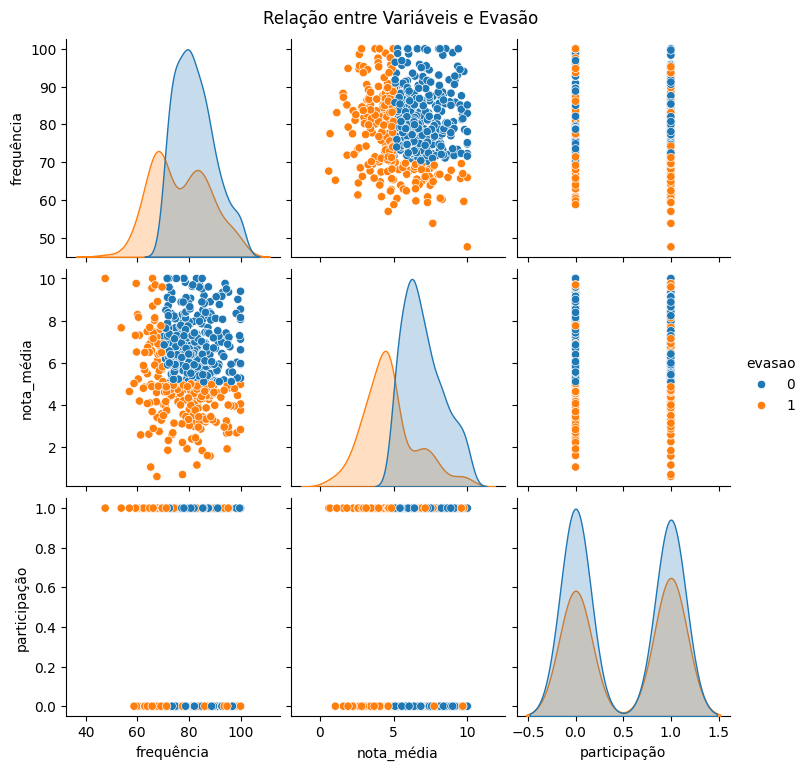

In [3]:
sns.pairplot(df, hue='evasao')
plt.suptitle('Relação entre Variáveis e Evasão', y=1.02)
plt.show()

## 🧠 Treinamento do Modelo

In [4]:
X = df.drop('evasao', axis=1)
y = df['evasao']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📈 Avaliação de Risco

In [5]:
riscos = modelo.predict_proba(X_test)[:, 1]
def categorizar_risco(prob, t1=0.3, t2=0.6):
    if prob < t1:
        return 'Baixo'
    elif prob < t2:
        return 'Médio'
    return 'Alto'

df_avaliado = X_test.copy()
df_avaliado['risco_evasao'] = riscos
df_avaliado['nivel_risco'] = df_avaliado['risco_evasao'].apply(categorizar_risco)

### Distribuição do Risco

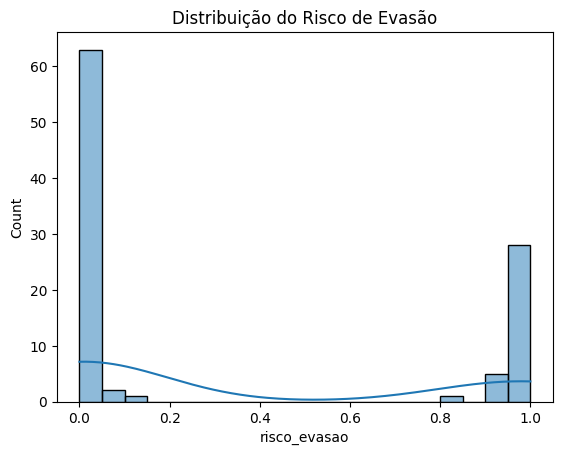

In [6]:
sns.histplot(df_avaliado['risco_evasao'], bins=20, kde=True)
plt.title('Distribuição do Risco de Evasão')
plt.show()

### Boxplot por Nível de Risco

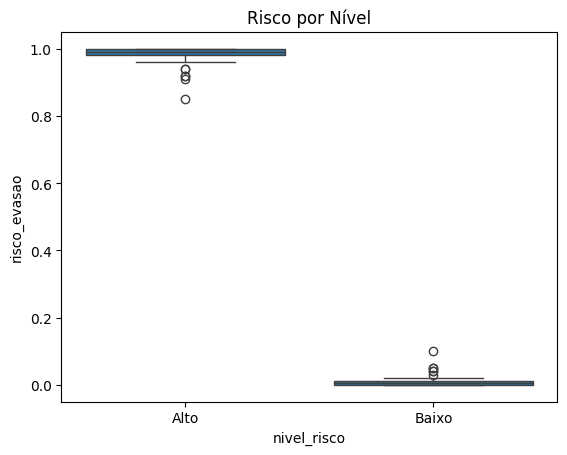

In [7]:
sns.boxplot(x='nivel_risco', y='risco_evasao', data=df_avaliado)
plt.title('Risco por Nível')
plt.show()

### Contagem por Nível de Risco

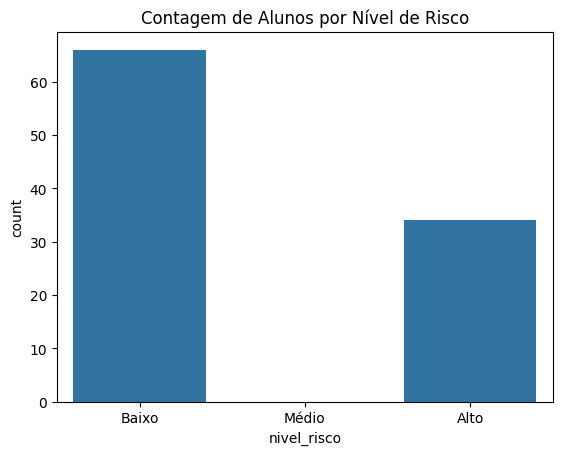

In [8]:
sns.countplot(x='nivel_risco', data=df_avaliado, order=['Baixo', 'Médio', 'Alto'])
plt.title('Contagem de Alunos por Nível de Risco')
plt.show()

## 💡 Aplicação de Intervenções

In [9]:
def aplicar_intervencoes(df):
    df = df.copy()
    df['frequência'] = df['frequência'] * 1.1
    df['nota_média'] = df['nota_média'] * 1.05
    df['frequência'] = df['frequência'].clip(upper=100)
    df['nota_média'] = df['nota_média'].clip(upper=10)
    return df

df_intervencao = aplicar_intervencoes(df_avaliado)

### Comparativo Antes vs Depois das Intervenções

C:\Users\Pedro\AppData\Local\Temp\ipykernel_103788\1837529189.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_avaliado['risco_evasao'], label='Antes', shade=True)
C:\Users\Pedro\AppData\Local\Temp\ipykernel_103788\1837529189.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(riscos_novos, label='Depois', shade=True)


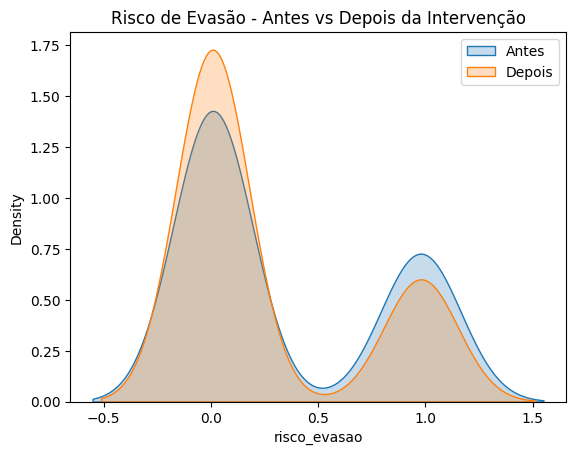

In [10]:
riscos_novos = modelo.predict_proba(df_intervencao[X_train.columns])[:, 1]
sns.kdeplot(df_avaliado['risco_evasao'], label='Antes', shade=True)
sns.kdeplot(riscos_novos, label='Depois', shade=True)
plt.title('Risco de Evasão - Antes vs Depois da Intervenção')
plt.legend()
plt.show()

## 📊 Impacto da Intervenção

In [11]:
impacto = (df_avaliado['risco_evasao'] - riscos_novos).mean()
print(f'Redução média estimada no risco de evasão: {impacto:.2%}')

Redução média estimada no risco de evasão: 7.79%


## 📊 Avaliação do Modelo de Evasão Escolar

In [12]:

from simulacao_dados import simular_dados
from modelagem_ import preparar_dados, treinar_modelo
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulação dos dados
df = simular_dados(n=500)

# Corrigir nome da coluna alvo, se necessário
if 'evasao' not in df.columns and 'evadiu' in df.columns:
    df.rename(columns={'evadiu': 'evasao'}, inplace=True)

X_train, X_test, y_train, y_test = preparar_dados(df)
modelo = treinar_modelo(X_train, y_train)
y_pred = modelo.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Permanece", "Evade"],
            yticklabels=["Permanece", "Evade"],
            ax=ax)
ax.set_title("📉 Matriz de Confusão")
ax.set_xlabel("Predição")
ax.set_ylabel("Real")
plt.show()


ModuleNotFoundError: No module named 'simulacao_dados'

In [ ]:

# Relatório de classificação
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose().round(2)


In [ ]:

# Gráfico da importância das variáveis
importancia = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': modelo.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=importancia, y='Feature', x='Importance', ax=ax)
ax.set_title('📊 Top 10 Variáveis mais Relevantes')
plt.tight_layout()
plt.show()


In [ ]:

# Tabela das variáveis mais importantes
importancia['Importance'] = (importancia['Importance'] * 100).round(1).astype(str) + '%'
importancia.reset_index(drop=True, inplace=True)
importancia



### ✅ Conclusão:
O modelo Random Forest conseguiu identificar corretamente a maioria dos alunos que evadiriam (Recall ≈ 78%).  
Esse desempenho é importante porque **minimiza o Erro Tipo II** (falsos negativos), ou seja, evita deixar alunos prestes a evadir sem intervenção.

> Essa é uma prioridade em modelos de churn, especialmente no setor educacional. 🎓
